## Question 1

We rerun the test with the prior 
\begin{eqnarray}
\pi_1|m & \sim & \left\{ \begin{array}{cc} \delta(\pi_1 - 0.5) & m = 0\\ 0.5\mathcal{B}(\pi; a, b) + 0.5\mathcal{B}(\pi; b, a) & m = 1 \end{array} \right.
\end{eqnarray}

and $\alpha=20 , \beta=3$ in which case all of the results have been evaluated to be fair when the experiment is run with the same sample size $(N=10)$.

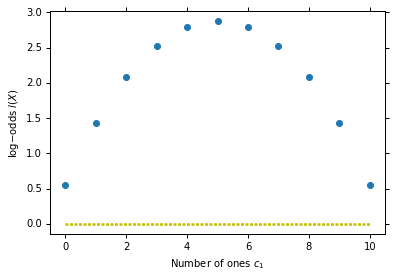

Log odds =  [ 0.54969525  1.42862421  2.0782657   2.5272365   2.79127021  2.87844691
  2.79127021  2.5272365   2.0782657   1.42862421  0.54969525]
Marginal likelihoods =  [-7.48116706 -8.36009602 -9.00973751 -9.4587083  -9.72274202 -9.80991871
 -9.72274202 -9.4587083  -9.00973751 -8.36009602 -7.48116706]


In [3]:
import numpy as np
from scipy.special import gammaln
import scipy.special as sps

def log_beta(c, a, b):
    N = c[0] + c[1]
    return gammaln(a+b) - gammaln(a) - gammaln(b) +  gammaln(c[0]+a) + gammaln(c[1]+b) - gammaln(N+a + b) 


def log_odds(c, a, b):
    # Total number of tosses
    N = c[0] + c[1]
    
    M_fair = N*np.log(0.5)
    M_fake = 0.5*log_beta(c, a, b)+0.5*log_beta(c, b, a)
    return M_fair - M_fake

N=10

c=[np.arange(0,N+1,1), np.zeros(N+1)]
c[1]+=N-c[0]


a = 20
b = 3
l=log_odds(c, a, b)
ml=N*np.log(0.5)-l


plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'y:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

print('Log odds = ', l)
print('Marginal likelihoods = ', ml)

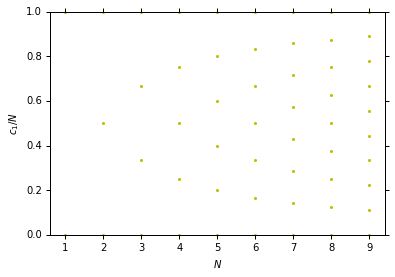

In [129]:
for N in range(1, 10):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds([N-c, c], a, b)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.y',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.b',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

There are two reasons for this. First, Beta distributions with swapped alpha and beta values superimposed on each other leads to a camel hump shaped distribution, since $\mathcal{B}(\alpha, \beta)$ and $\mathcal{B}(\beta, \alpha)$ are symmetric about $x=0.5$ line. In this respect, both odds are evaluated to be fair. Second, the difference between the two values is large. This inevitably leads to difficulty in detecting deviation in small samples.

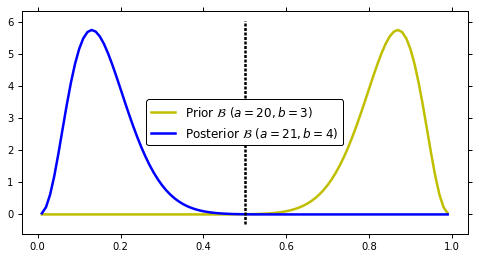

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gammaln

def log_beta_pdf(x, a, b):
    return - gammaln(a) - gammaln(b) + gammaln(a+b) + np.log(x)*(a-1) + np.log(1-x)*(b-1) 

x = np.arange(0.01,1,0.01)

a = 20
b = 3
c_0 = 1
c_1 = 1
N = c_0 + c_1

pi_ML = c_1/N

plt.figure(figsize=(8,4))
#plt.plot(x, np.exp(log_beta_pdf(x, a, b)), 'b')
plt.plot(x, np.exp(log_beta_pdf(x, a+c_1, b+c_0)), 'y')
plt.plot(x, np.exp(log_beta_pdf(x, b+c_0, a+c_1)), 'b')
yl = plt.gca().get_ylim()
plt.plot([pi_ML, pi_ML], yl , 'k:')
plt.legend(["Prior $\cal B$ $(a={}, b={})$".format(a,b), "Posterior $\cal B$ $(a={}, b={})$".format(a+c_1, b+c_0)], loc="best")
plt.show()

We rerun the tests with $N=60$ and see a significant difference.

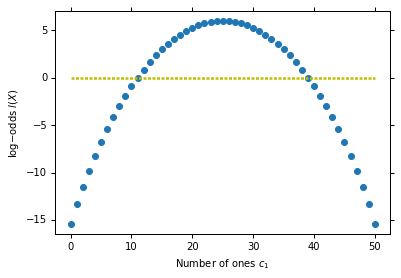

Log odds =  [-15.40932745 -13.36382462 -11.50356635  -9.79544872  -8.21833804
  -6.75752589  -5.40216923  -4.14394173  -2.97625427  -1.89377241
  -0.89210131   0.03242885   0.88291412   1.66198643   2.37189496
   3.01456769   3.59165876   4.10458523   4.55455603   4.94259481
   5.26955804   5.53614931   5.74293047   5.89033024   5.97865052
   6.00807077   5.97865052   5.89033024   5.74293047   5.53614931
   5.26955804   4.94259481   4.55455603   4.10458523   3.59165876
   3.01456769   2.37189496   1.66198643   0.88291412   0.03242885
  -0.89210131  -1.89377241  -2.97625427  -4.14394173  -5.40216923
  -6.75752589  -8.21833804  -9.79544872 -11.50356635 -13.36382462
 -15.40932745]
Marginal likelihoods =  [-19.24803158 -21.29353441 -23.15379268 -24.86191031 -26.43902099
 -27.89983314 -29.2551898  -30.5134173  -31.68110476 -32.76358662
 -33.76525772 -34.68978788 -35.54027315 -36.31934546 -37.02925398
 -37.67192672 -38.24901779 -38.76194426 -39.21191506 -39.59995384
 -39.92691707 -40.1935083

In [131]:
N=50

c=[np.arange(0,N+1,1), np.zeros(N+1)]
c[1]+=N-c[0]


a = 20
b = 3
l=log_odds(c, a, b)
ml=N*np.log(0.5)-l


plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'y:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

print('Log odds = ', l)
print('Marginal likelihoods = ', ml)

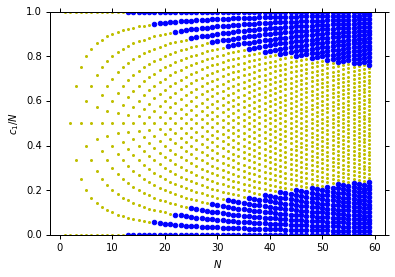

In [135]:
for N in range(1, 60):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds([N-c, c], a, b)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.y',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.b',markersize=9)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

## Question 2

We draw $\pi_1$ and $\pi_2$ uniformly from $[0-1]$ interval since $\mathcal{B}(1,1)$ is equivalent to standard uniform distribution. What we are looking for is the $n$ value that will maximize the posterior probability

$$p(x_{1:50}|n)=p(x_{1:n}|\pi_0).p(x_{n+1:50}|\pi_1).p(n)$$

We observe that $n$ is a-priori uniform, thus it is a scalar and can be neglected in a maximization problem. The quantity we try to maximize then, is the product of the remining two. In a binomial model, the marginal likelihood for the data created with a parameter $\pi$ drawn from Beta distribution $\mathcal{B}(\pi;\alpha,\beta)$ is given with:

\begin{eqnarray}
p(X)=\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \frac{\Gamma(c_0+\alpha)\Gamma(c_1+\beta)}{\Gamma(c_0 + c_1 +\alpha + \beta)}
\end{eqnarray}

where $c_0$ and $c_1$ are the number of returning $0$'s and $1$'s, respectively. We work with the log-likelihoods instead. We iterate over the possible locations of the change point and evaluate the resulting log-likelihoods.

The actual cutpoint:  23
The output:  22
Pi values:  [ 0.96058905  0.00933282]


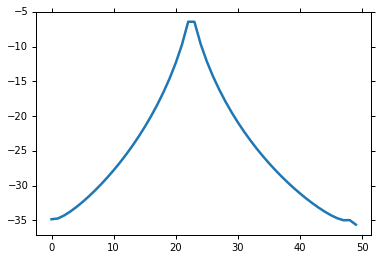

In [27]:
def count(x):
    c=[x.count(0), x.count(1)]
    return log_beta(c, 1, 1)
    
    
#first we generate data

N=50

n  = np.random.randint(0,N-1)
pi = np.random.rand(2)

seq = []


#draw from pi
for i in range(0,499):
    if(i<n):
        seq.append(int(np.random.rand()<pi[0]))
    else:
        seq.append(int(np.random.rand()<pi[1]))

likelihood=np.zeros(N)        

#print(n, pi , seq, likelihood)

for i in range(0,N):
    likelihood[i]=count(seq[0:i])+count(seq[i+1:N-1])

plt.plot(likelihood)
plt.show

print("The actual cutpoint: ", n)
print("The output: ", np.argmax(likelihood))
print("Pi values: ", pi)

The actual cutpoint:  43
The output:  2
Pi values:  [ 0.82987392  0.80060187]


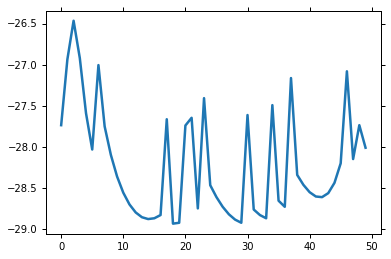

In [34]:
def count(x):
    c=[x.count(0), x.count(1)]
    return log_beta(c, 1, 1)
    
    
#first we generate data

N=50

n  = np.random.randint(0,N-1)
pi = np.random.rand(2)

seq = []


#draw from pi
for i in range(0,499):
    if(i<n):
        seq.append(int(np.random.rand()<pi[0]))
    else:
        seq.append(int(np.random.rand()<pi[1]))

likelihood=np.zeros(N)        

#print(n, pi , seq, likelihood)

for i in range(0,N):
    likelihood[i]=count(seq[0:i])+count(seq[i+1:N-1])

plt.plot(likelihood)
plt.show

print("The actual cutpoint: ", n)
print("The output: ", np.argmax(likelihood))
print("Pi values: ", pi)

The actual cutpoint:  18
The output:  18
Pi values:  [ 0.53199147  0.9163084 ]


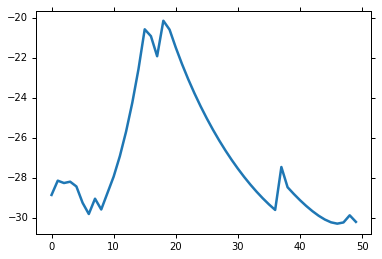

In [36]:
def count(x):
    c=[x.count(0), x.count(1)]
    return log_beta(c, 1, 1)
    
    
#first we generate data

N=50

n  = np.random.randint(0,N-1)
pi = np.random.rand(2)

seq = []


#draw from pi
for i in range(0,499):
    if(i<n):
        seq.append(int(np.random.rand()<pi[0]))
    else:
        seq.append(int(np.random.rand()<pi[1]))

likelihood=np.zeros(N)        

#print(n, pi , seq, likelihood)

for i in range(0,N):
    likelihood[i]=count(seq[0:i])+count(seq[i+1:N-1])

plt.plot(likelihood)
plt.show

print("The actual cutpoint: ", n)
print("The output: ", np.argmax(likelihood))
print("Pi values: ", pi)

As seen in the examples above when the $\pi$ values are distant of each other the algorithm is successful detecting the changepoint, whereas when the $\pi$ values are close to each other the algorithm performs poorly. Both possibilities are on the table for the $\pi$ differences in between.



### References:

http://www.math.uah.edu/stat/dist/Transformations.html

http://www.math.uah.edu/stat/expect/Generating.html#mgf

http://www.math.uah.edu/stat/special/Normal.html

http://www.math.uah.edu/stat/special/Gamma.html

http://www.math.uah.edu/stat/special/Beta.html